In [1]:
import matplotlib.pyplot as plt
import cv2

In [3]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras_vggface.utils import preprocess_input
datagen = ImageDataGenerator(
    rescale=1/255, # масштабирование значений пикселей в диапазон от 0 до 1
    rotation_range=20, # угол поворота изображения
    width_shift_range=0.2, # смещение изображения по горизонтали
    height_shift_range=0.2, # смещение изображения по вертикали
    shear_range=0.2, # сдвиг изображения
    zoom_range=0.2, # масштабирование изображения
    vertical_flip=True, #отражение изображения по вертикали
    horizontal_flip=True, # отражение изображения по горизонтали
    brightness_range= (0.5,2.5), # ljgecnbvst pyfxtybz lkz brightness range
    fill_mode='nearest', # заполнение пикселей после преобразований
    preprocessing_function=preprocess_input # препроцессинг изображений для распознавания лиц

)

In [ ]:
import os
from keras.preprocessing import image
import keras.utils as image


original_dir = 'фото/cuted_test/'

augmented_dir = 'фото/aug_cuted_test'

if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

for root, dirs, files in os.walk(original_dir):
    for filename in files:
        img_path = os.path.join(root, filename)
        img = image.load_img(img_path)
        img = img.convert('RGB')
        x = image.img_to_array(img)
        x = preprocess_input(x)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=augmented_dir,
                                  save_prefix=filename.split('.')[0],
                                  save_format='jpg'):
            i += 1
            if i >= 5: # 5 случайные
                break


In [4]:
datagen.flow_from_directory('../фото/aug_c_t/aug_cuted_train/')

Found 2644 images belonging to 15 classes.


In [5]:
datagen.flow_from_directory('../фото/aug_c_t/aug_cuted_test/')

Found 298 images belonging to 15 classes.


In [6]:
image_shape = (150,150,3)
# image_shape = (224,224,3)

In [7]:
# from keras import Sequential
# from keras.layers import BatchNormalization
# from keras.regularizers import l2
# from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
# from keras.optimizers import Adam
# from tensorflow.keras.preprocessing import image



# import tensorflow as tf
# from tensorflow.keras import layers


In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

classifier= Sequential()


classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(150,150,3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(15, activation='softmax'))

#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])



In [9]:
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73984)             0         
                                                                 
 dense (Dense)               (None, 64)                4

In [168]:
# # compile
# from keras.optimizers import SGD
# from keras.optimizers import rmsprop
# from keras.optimizers import Adam

# optimizer = Adam(lr=0.0001)

# classifier.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
batch_size = 32
# cuted images
train_image_gen = datagen.flow_from_directory('../фото/aug_c_t/aug_cuted_train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') 
                                               # shuffle = True) #binary, sparse, categorical

Found 2644 images belonging to 15 classes.


In [12]:
test_image_gen = datagen.flow_from_directory('../фото/aug_c_t/aug_cuted_test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
                                               # shuffle=True)

Found 298 images belonging to 15 classes.


In [13]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Ernar': 6,
 'Kenzhebay Askar': 7,
 'Kyran Yerkin': 8,
 'Maxat Ualikhan': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Yerkin Yernar': 12,
 'Zhetessov Nur': 13,
 'Zhumabekov Magjan': 14}

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
print(train_image_gen.n)
print(train_image_gen.batch_size)

2644
32


In [16]:
hehe = classifier.fit_generator(
                    train_image_gen,
                    steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
                    epochs=100,
                    validation_data=test_image_gen,
                    validation_steps=test_image_gen.n // test_image_gen.batch_size)

Epoch 1/100
82/82 [==============================] - 129s 2s/step - loss: 2.7257 - accuracy: 0.1053 - val_loss: 2.6735 - val_accuracy: 0.1319
Epoch 2/100
82/82 [==============================] - 100s 1s/step - loss: 2.5657 - accuracy: 0.1497 - val_loss: 2.5340 - val_accuracy: 0.1736
Epoch 3/100
82/82 [==============================] - 102s 1s/step - loss: 2.4867 - accuracy: 0.1619 - val_loss: 2.5857 - val_accuracy: 0.1319
Epoch 4/100
82/82 [==============================] - 100s 1s/step - loss: 2.4092 - accuracy: 0.1979 - val_loss: 2.5143 - val_accuracy: 0.1493
Epoch 5/100
82/82 [==============================] - 100s 1s/step - loss: 2.3122 - accuracy: 0.2420 - val_loss: 2.3720 - val_accuracy: 0.2535
Epoch 6/100
82/82 [==============================] - 103s 1s/step - loss: 2.2890 - accuracy: 0.2366 - val_loss: 2.2736 - val_accuracy: 0.2917
Epoch 7/100
82/82 [==============================] - 99s 1s/step - loss: 2.1466 - accuracy: 0.2940 - val_loss: 2.2716 - val_accuracy: 0.2500
Epoch 8

In [17]:
hehe.history['accuracy']

[0.10528330504894257,
 0.14969372749328613,
 0.16194486618041992,
 0.19793261587619781,
 0.24196018278598785,
 0.23660030961036682,
 0.29402756690979004,
 0.3074272572994232,
 0.3319295644760132,
 0.3357580304145813,
 0.37366002798080444,
 0.3866768777370453,
 0.4176875948905945,
 0.41960182785987854,
 0.4264931082725525,
 0.4575038254261017,
 0.4663093388080597,
 0.4785604774951935,
 0.49693721532821655,
 0.5053598880767822,
 0.5179938673973083,
 0.5294793248176575,
 0.552833080291748,
 0.5421133041381836,
 0.5532159209251404,
 0.5635528564453125,
 0.5746554136276245,
 0.5803981423377991,
 0.5876722931861877,
 0.5999234318733215,
 0.5976263284683228,
 0.5999234318733215,
 0.6098774671554565,
 0.6110260486602783,
 0.6167687773704529,
 0.6094946265220642,
 0.63705974817276,
 0.6405053734779358,
 0.6271056532859802,
 0.6347626447677612,
 0.6485452055931091,
 0.6531393527984619,
 0.6600306034088135,
 0.6527565121650696,
 0.65696781873703,
 0.6680704355239868,
 0.673430323600769,
 0.666539

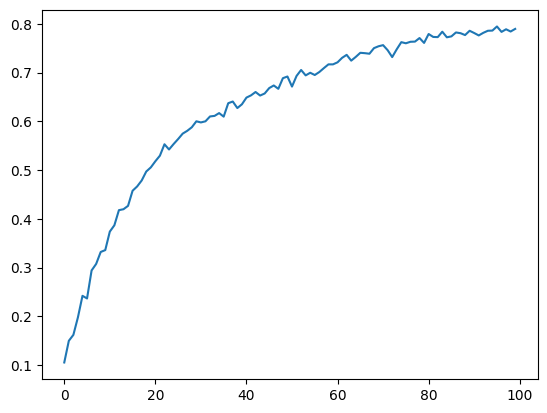

In [18]:
plt.plot(hehe.history['accuracy'])

In [19]:
# classifier.save('hehe_cutedPhoto_model.h5')

In [20]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('hehe_cutedPhoto_model.h5')

class_dict = {
    # 4: 'Akhmedov Sanzhar',
    # 1: 'Alikhan Zhamankhan',
    # 2: 'Baibatchayeva Anar',
    # 3: 'Dalabay Abylay',
    # 0: 'Ernar'
    0: 'Akhmedov Sanzhar',
    1: 'Alikhan Zhamankhan',
    2: 'Baibatchayeva Anar',
    3: 'Dalabay Abylay',
    4: 'Daniyar Raiymbekov',
    5: 'Duisenov Alikhan',
    11: 'Ernar',
    7: 'Kenzhebay Askar',
    8: 'Kyran Yerkin',
    9: 'Maxat Ualikhan',
    10: 'Rysmambetov Nurtugan',
    6: 'Sagynbek Nurbolat',
    12: 'Yerkin Yernar',
    13: 'Zhetessov Nur',
    14: 'Zhumabekov Magjan'
}

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    # print(ret, frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))
        face = np.expand_dims(face, axis=0)
        face = np.expand_dims(face, axis=-1)
        face = face / 255.0

        # prediction = model.predict(face)
        # prediction_class = np.argmax(prediction)
        # print(prediction_class)
        # prediction_value = prediction[prediction_class] * 100
        # name = class_dict[prediction_class]
        
        
        prediction = model.predict(face)
        prediction_class = np.argmax(prediction, axis=-1)
        prediction_value = prediction[0][prediction_class[0]] * 100
        name = class_dict[prediction_class[0]]

        
        
        

        label = f"{prediction_value:.2f}% match, {name}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 34ms/step


In [2]:
model.history['accuracy']

TypeError: 'History' object is not subscriptable